# California Housing Regression: A Complete Example

## Load and explore data

In [1]:
# import the module to load the included data
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California housing dataset
data = fetch_california_housing()

In [3]:
# show how data is organized
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

### As the above shows, after being loaded, the dataset is a dictionary. These 4 keys are important:
- The key "data" stores the value of the main data in a 2D array. Why 2D array? That's because the rows are data points, and the columns are variables.
- The key "feature_names" are variable names. With "data", they are "x" values and names.
- The key "target" stores the value of output in a 1D array. 
- The key "target_names" stores the output name. With "target", they are matching "y" values and name.

In [4]:
# breakdown
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Data shape:", data.data.shape)
print("Target shape:", data.target.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names: ['MedHouseVal']
Data shape: (20640, 8)
Target shape: (20640,)


### Convert the dataset to Pandas dataframe
Pandas is a powerful Python library for data manipulation and analysis. 
It provides data structures like DataFrame and Series, which make it easy to handle structured data.

In Pandas,
- A DataFrame is like a table or spreadsheet with rows and multiple columns, where each column can have a different data type (e.g., numbers, strings, dates).
- A Series is like a single column of that table — it's a one-dimensional labeled array.

In [5]:
import pandas as pd

In [6]:
xs = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name=data.target_names[0])

In [7]:
# Show the first few rows of the DataFrame
print(xs.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [8]:
print(y.name)
print(y.head())

MedHouseVal
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


### Save the dataframe to files and load them back
This demonstrate the data can be loaded from files to dataframe directly


In [9]:
# Save to files
xs.to_csv("california_housing.csv", index=False)
y.to_csv("california_housing_target.csv", index=False)

# Load the dataset from CSV files
xs = pd.read_csv("california_housing.csv")
y = pd.read_csv("california_housing_target.csv")

In [12]:
xs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


data.info()

### Visualize the data
Use plots to understand the relationships between features and the target (MedHouseVal).

- Features are variables (xs)
- Target is the result (y)

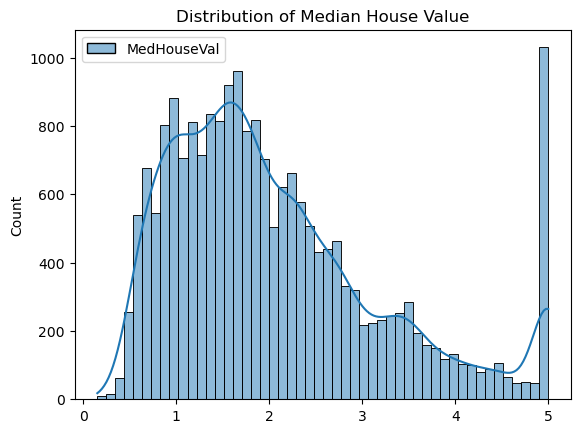

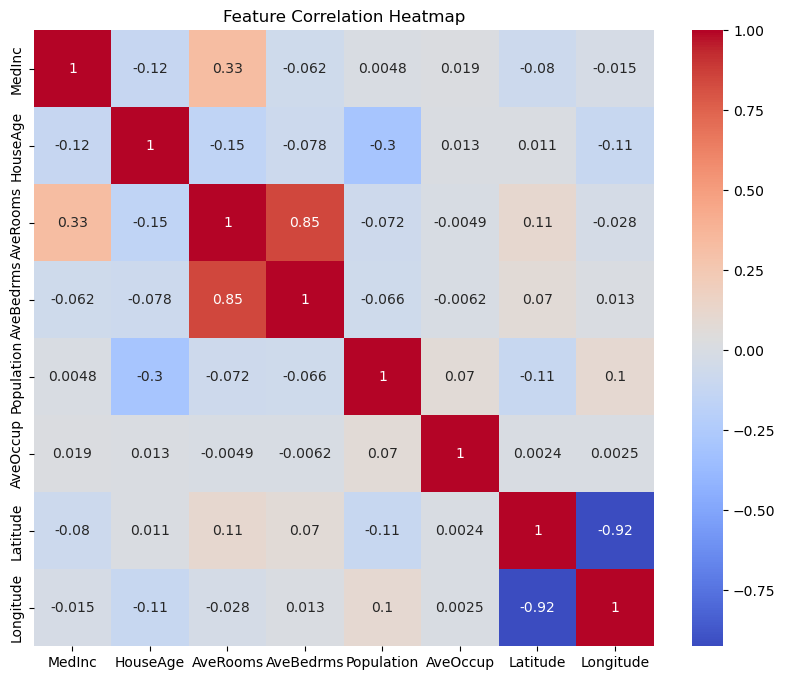

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target
sns.histplot(y, bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(xs.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Notes
1. **KDE = True**  
In Seaborn, the kde=True argument in the statement sns.histplot(y, bins=50, kde=True) tells Seaborn to add a Kernel Density Estimate (KDE) curve on top of the histogram.

What it means:
The histogram shows the frequency distribution of the data in bins.

The KDE is a smooth curve that estimates the probability density function of the data — it gives a continuous representation of where the data is concentrated.

So with kde=True, you’re getting both:

A bar-based view (histogram),

and a smoothed curve (KDE) showing the estimated distribution.

This helps you better visualize the shape and spread of your data.

2. **xs.coor()**
xs.corr() computes the pairwise correlation of columns in the DataFrame xs, excluding NA/null values.

By default, it uses Pearson correlation, which measures linear relationships.

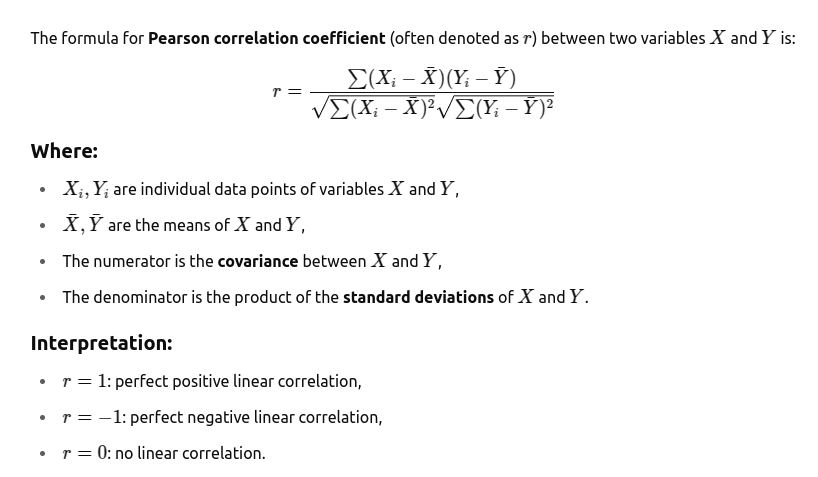
